# Расчет проводимости трубопроводов с помощью МУК

In [1]:
import math
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

## Круглое сечение

### Без разбиения

In [2]:
class Round_section:
    def __init__(self, L, R = 1):
        self.R = R
        self.L = L
        
    def coaxial_discs(self, s) -> float:
        x = s**2 + self.R**2 + self.R**2
        return 1/(2*self.R**2) * ( x - math.sqrt(x**2 - 4*self.R**2 * self.R**2) )
    
    def no_splitting(self) -> float:
        phi_12 = self.coaxial_discs(self.L)
        phi_21 = phi_12
        phi_11, phi_22 = 0, 0
        phi_13 = 1 - phi_11 - phi_12
        phi_23 = 1 - phi_21 - phi_22
        
        S_1 = math.pi * self.R**2
        S_3 = 2*math.pi*self.R * self.L
        phi_31 = phi_13 * S_1 / S_3
        phi_32 = phi_31
        phi_33 = 1 - phi_31 - phi_32
        
        k = phi_12 + phi_13 * phi_32 / ( 1 - phi_33 )
        return k

In [3]:
section_1 = Round_section(2)
section_1.no_splitting()

0.5857864376269049

### С разбиением

In [4]:
def splitting(self) -> float:
        phi_11, phi_55 = 0, 0
        phi_15 = self.coaxial_discs(self.L/2)
        phi_51 = phi_15
        phi_13 = 1 - phi_11 - phi_15

        S_1 = math.pi*self.R**2
        S_3 = 2*math.pi*self.R*self.L/2
        phi_31 = phi_13 * S_1 / S_3
        phi_35 = phi_31
        phi_33 = 1 - phi_31 - phi_35
        phi_53 = 1 - phi_55 - phi_51
        
        phi_22 = 0
        phi_52, phi_25 = phi_15, phi_15
        phi_54 = phi_13

        phi_45, phi_42 = phi_31, phi_31
        phi_44 = phi_33
        phi_24 = phi_53
        
        x = phi_54*phi_42/(1 - phi_44) + phi_52
        y = phi_13*phi_35/(1 - phi_33) + phi_15
        z = 1 - phi_53*phi_35/(1 - phi_33) * phi_54*phi_45/(1 - phi_44)
        k = x*y/z
        return k

Round_section.splitting = splitting

In [5]:
section_1.splitting()

0.5278640450004206

### Графики

In [6]:
def name(title):
    if title:
        plt.title(title, color= "red")
    return

def save(filename):
    if filename:
        plt.savefig(filename)
    return

def customize_graph(title = ""):
    fig = plt.figure(figsize=(12,9))
    ax  = fig.add_subplot(111)
    ax.tick_params(axis="x", colors="red")
    ax.tick_params(axis="y", colors="red")
    
    plt.grid()
    plt.xlabel('L/d', color="red")
    plt.ylabel('k'  , color="red")
    
    name(title)
    return

def lines(x, k, filename = ""):
    k_1 = [Round_section(element).no_splitting() for element in x]
    k_2 = [Round_section(element).splitting() for element in x]
        
    plt.scatter(x, k_1, label= "Без разбиения", marker="o")
    plt.plot(x, k_1)
        
    plt.scatter(x, k_2, label= "С разбиением" , marker="o")
    plt.plot(x, k_2)
        
    plt.scatter(x, k  , label= "Теоретический", marker="o")
    plt.plot(x, k  )
    plt.legend()
    save(filename)
    

In [7]:
class Graph:
    def __init__(self):
        # данные взяты из ссылки №2 Links.txt
        k = [1, 0.9092, 0.8341, 0.7711, 0.7177, 0.6720, 0.6320, 0.5970, 0.5659, 0.5384, 0.5136, 0.4914, 0.4711]
        k+= [0.4527, 0.4359, 0.4205, 0.4062, 0.3931, 0.3809, 0.3695, 0.3589, 0.3146, 0.2807, 0.2537, 0.2316]
        k+= [0.2131, 0.1973, 0.1719, 0.1523, 0.1367, 0.1240, 0.1135]
        k = np.array(k)
        
        self.k = k
        return
        
    def draw(self):
        customize_graph("Проводимость в круглом сечении при L/d < 2")
        lines(np.linspace(0,2,21), self.k[:21], "L less then 2.png")
        plt.show()
        
        customize_graph("Проводимость в круглом сечении при L/d < 5")
        lines(np.linspace(2,5,7), self.k[20:27], "L less then 5.png")
        plt.show()
        
        customize_graph("Проводимость в круглом сечении при L/d < 10")
        lines(np.linspace(5,10,6), self.k[26:], "L less then 10.png")
        plt.show()
        

C:\Users\ASUS\AppData\Local\Temp/ipykernel_9140/1359622613.py:19: RuntimeWarning: invalid value encountered in double_scalars
  phi_31 = phi_13 * S_1 / S_3
C:\Users\ASUS\AppData\Local\Temp/ipykernel_9140/26638023.py:9: RuntimeWarning: invalid value encountered in double_scalars
  phi_31 = phi_13 * S_1 / S_3


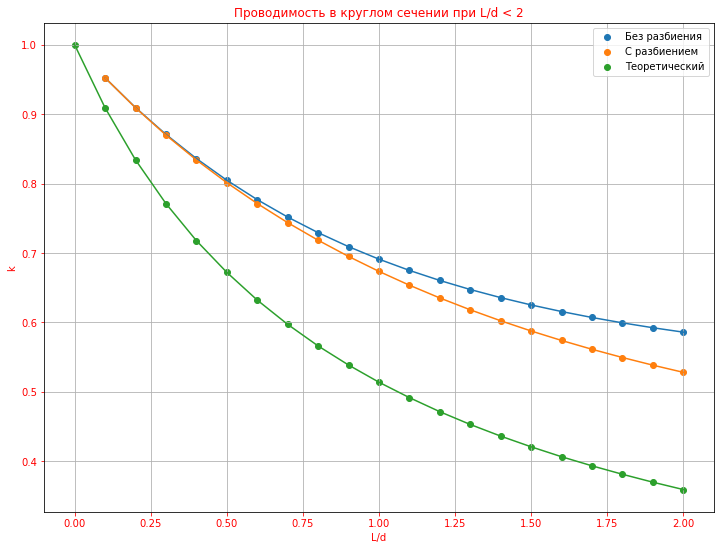

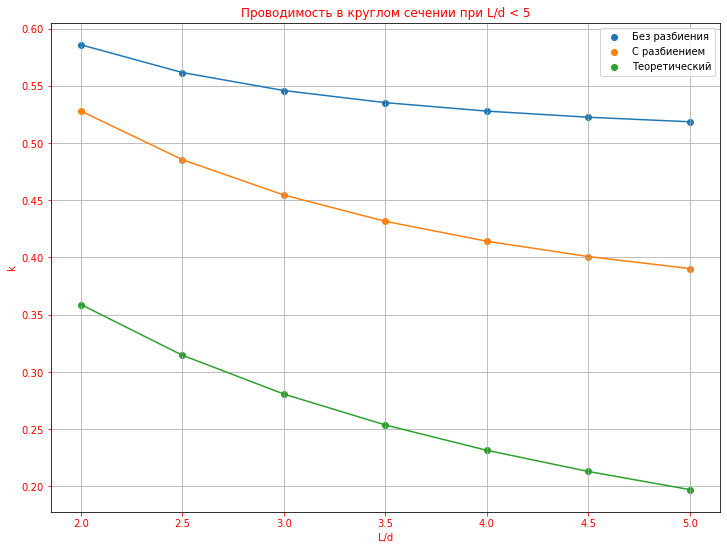

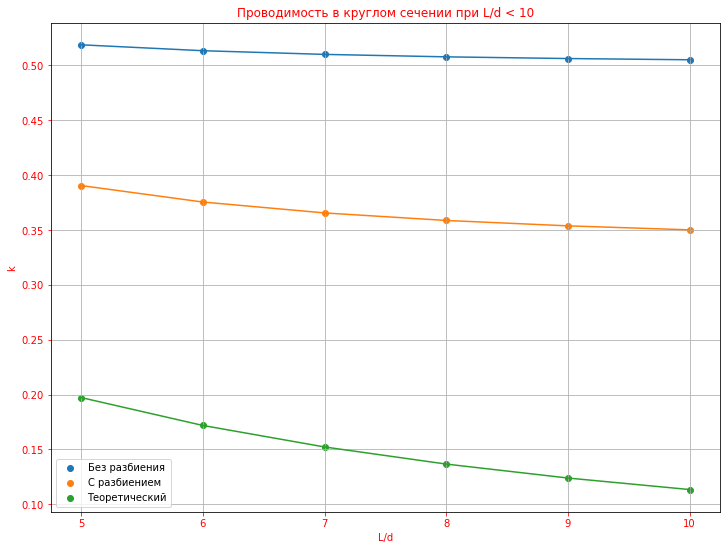

In [8]:
Graph().draw()

## Прямоугольное сечение